In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Daily web 

## Import

In [2]:
df_day = pd.read_csv('../datasets/Nettfart_daily_web.csv')
df_day.Tid = pd.to_datetime(df_day['Tid'])
df_day.index= df_day.Tid

In [3]:
df_day.rename(columns = {"('quantile_down', 0.75)": "quant_down_0.75", 
                         "('quantile_down', 0.25)": "quant_down_0.25", 
                         "('quantile_up', 0.75)": "quant_up_0.75",
                         "('quantile_up', 0.25)": "quant_up_0.25",
                         "('quantile_delay', 0.75)": "quant_delay_0.75",
                         "('quantile_delay', 0.25)": "quant_delay_0.25"}, inplace =True)
df_day.info()
df_day.head()
df_day.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3288 entries, 2012-01-01 to 2020-12-31
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tid               3288 non-null   datetime64[ns]
 1   median_down       3287 non-null   float64       
 2   median_up         3287 non-null   float64       
 3   median_delay      3287 non-null   float64       
 4   mean_down         3287 non-null   float64       
 5   mean_up           3287 non-null   float64       
 6   mean_delay        3287 non-null   float64       
 7   std_down          3286 non-null   float64       
 8   std_up            3286 non-null   float64       
 9   std_delay         3286 non-null   float64       
 10  quant_down_0.25   3287 non-null   float64       
 11  quant_down_0.75   3287 non-null   float64       
 12  quant_up_0.25     3287 non-null   float64       
 13  quant_up_0.75     3287 non-null   float64       
 14  quant_

,median_down,median_up,median_delay,mean_down,mean_up,mean_delay,std_down,std_up,std_delay,quant_down_0.25,quant_down_0.75,quant_up_0.25,quant_up_0.75,quant_delay_0.25,quant_delay_0.75,count
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3286.000000,3286.000000,3286.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3288.000000
mean,23.855246,12.011235,18.214938,50.972173,38.930531,37.742867,81.850267,81.099425,132.844442,8.074697,57.033988,3.064605,37.325391,9.964177,33.149833,3306.137470
std,14.983342,9.923142,6.285118,31.461795,27.948471,20.332711,41.671133,44.088185,260.207826,4.909424,35.117022,3.311052,29.248954,3.086633,12.045766,1056.368501
min,5.481000,0.827000,10.000000,8.719000,2.877333,16.467623,2.806516,3.587716,19.041263,1.891250,9.717000,0.445000,3.923500,5.000000,19.000000,0.000000
25%,10.508500,3.102000,14.000000,21.454359,12.822486,22.317682,41.748608,38.099682,46.610644,4.082875,24.879500,0.673250,10.636750,8.000000,25.000000,2609.500000
50%,18.209000,9.280500,16.000000,40.131678,29.434984,32.654521,82.323694,82.141036,99.840827,5.734000,45.881500,1.069000,25.534500,9.000000,28.000000,3269.500000
75%,38.708750,20.030500,19.000000,81.614090,61.941191,45.896175,121.942654,120.049025,143.972958,11.961250,91.219625,4.896250,55.294000,10.000000,33.000000,3974.250000
max,63.712000,44.662500,38.000000,119.512675,106.666239,329.341615,172.449666,179.389809,4462.605331,24.203000,155.612750,14.448250,115.665000,23.000000,103.250000,10953.000000


In [4]:
corr_matrix = df_day.corr()
corr_matrix['count'].sort_values(ascending=False)

count               1.000000
quant_down_0.25     0.312428
quant_up_0.25       0.311601
std_up              0.281582
median_down         0.274755
median_up           0.273950
quant_down_0.75     0.271817
mean_up             0.267478
quant_up_0.75       0.266292
mean_down           0.254325
std_down            0.250977
std_delay          -0.184920
mean_delay         -0.295948
quant_delay_0.25   -0.319751
median_delay       -0.328931
quant_delay_0.75   -0.334933
Name: count, dtype: float64

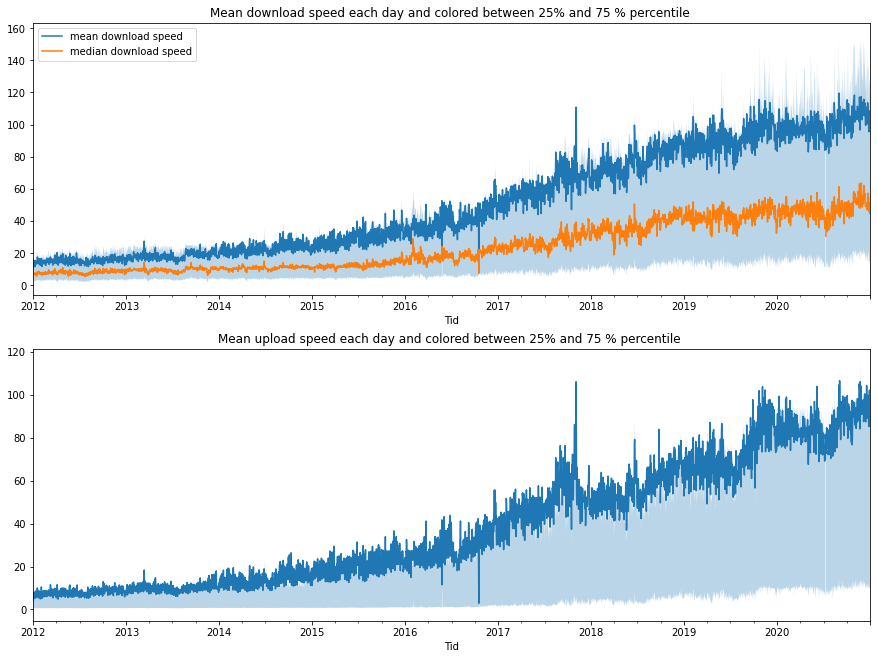

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols= 1, figsize = (15, 11), sharex=False)
df_day.mean_down.plot(ax=ax1, label='mean download speed', style='-')
df_day.median_down.plot(ax=ax1, label='median download speed', style='-')
df_day.mean_up.plot(ax=ax2 , label='mean upload speed')
ax1.fill_between(df_day.Tid.values,df_day["quant_down_0.25"], df_day["quant_down_0.75"], alpha = 0.3)
ax2.fill_between(df_day.Tid.values,df_day["quant_up_0.25"], df_day["quant_up_0.75"], alpha = 0.3)
ax1.set_title("Mean download speed each day and colored between 25% and 75 % percentile ")
ax2.set_title("Mean upload speed each day and colored between 25% and 75 % percentile ")
ax1.legend(loc='upper left')


plt.show()

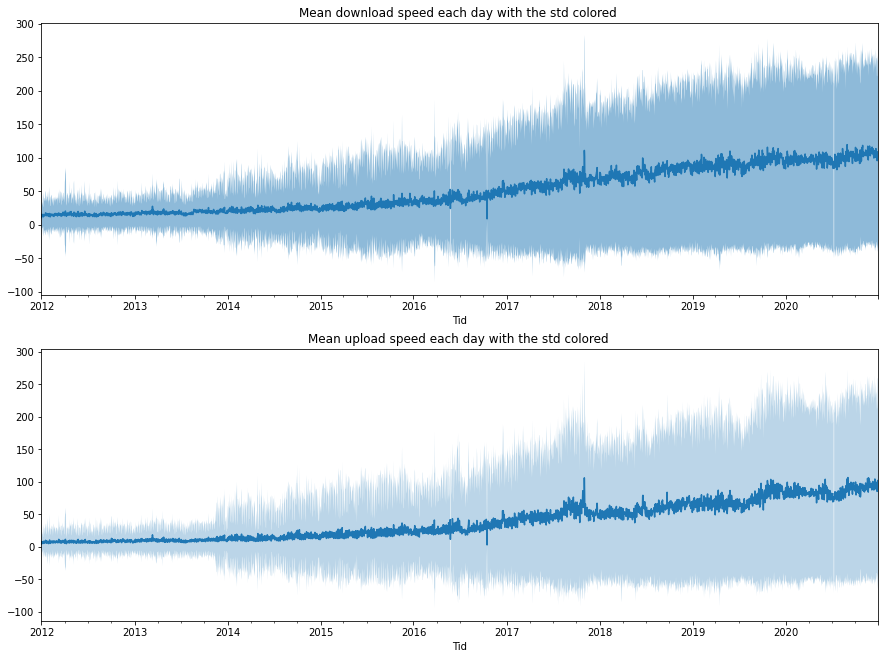

In [6]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols= 1, figsize = (15, 11), sharex=False)
df_day.mean_down.plot(ax=ax1, label='mean download speed', style='-')
df_day.mean_up.plot(ax=ax2 , label='mean upload speed')
ax1.fill_between(df_day.Tid.values,df_day.mean_down - df_day.std_down,df_day.mean_down + df_day.std_down, alpha = 0.5)
ax2.fill_between(df_day.Tid.values,df_day.mean_up - df_day.std_up,df_day.mean_up + df_day.std_up, alpha = 0.3)
ax1.set_title("Mean download speed each day with the std colored ")
ax2.set_title("Mean upload speed each day with the std colored ")


plt.show()

The plot above shows to what degree 

<AxesSubplot:xlabel='Tid', ylabel='mean_delay'>

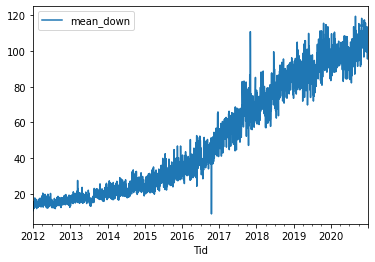

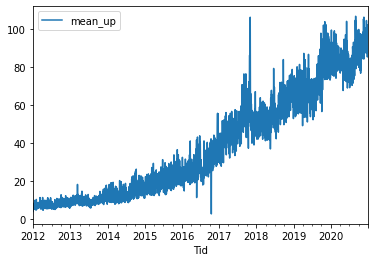

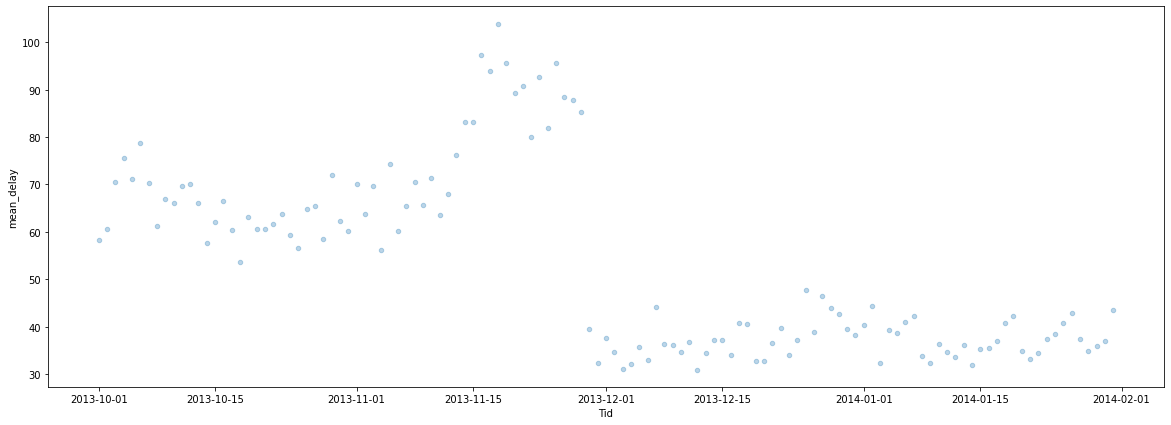

In [7]:
df_day.plot( kind= 'line', x='Tid', y='mean_down')
df_day.plot( kind= 'line', x='Tid', y='mean_up')
df_day.loc['2013-10': '2014-01'].plot( kind= 'scatter', x='Tid', y='mean_delay', alpha = 0.3, figsize=(20, 7))

<AxesSubplot:xlabel='Tid', ylabel='std_delay'>

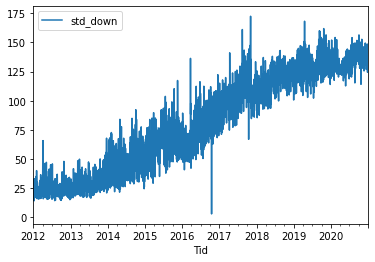

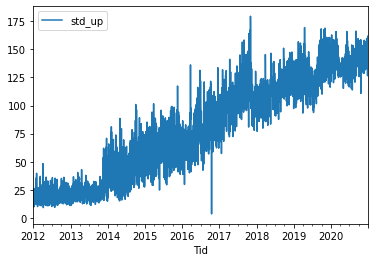

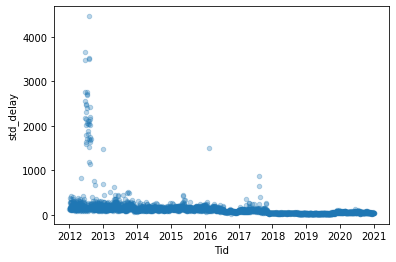

In [8]:
df_day.plot( kind= 'line', x='Tid', y='std_down')
df_day.plot( kind= 'line', x='Tid', y='std_up')
df_day.plot( kind= 'scatter', x='Tid', y='std_delay', alpha=0.3)

<AxesSubplot:xlabel='Tid'>

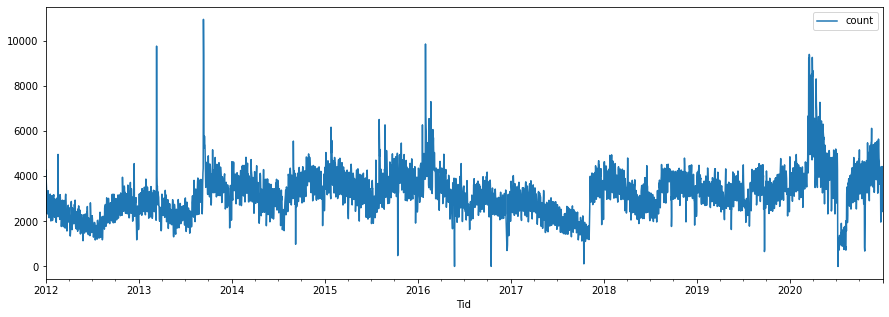

In [9]:

df_day.plot( kind= 'line', x='Tid', y='count', figsize=(15, 5))


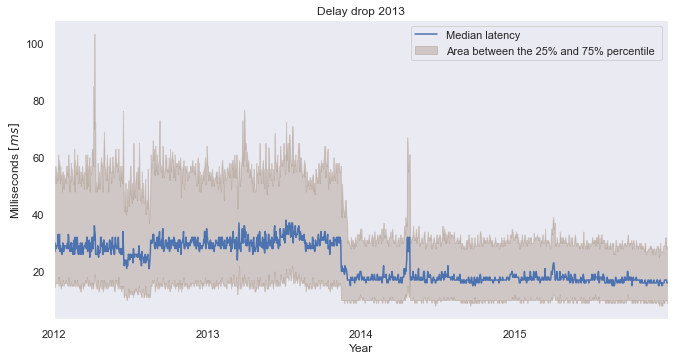

In [17]:
sns.set_theme(style='darkgrid')
day_13_15 = df_day.loc['2012':'2015']
fig, ax1 = plt.subplots(nrows=1, ncols= 1, figsize = (11, 11/2), sharex=False)
#df_day.mean_delay.plot(ax=ax1, label='Mean latency', style='-')
day_13_15.median_delay.plot(ax=ax1, label='Median latency', style='-')

ax1.fill_between(day_13_15.Tid.values,day_13_15["quant_delay_0.25"], day_13_15["quant_delay_0.75"], alpha = 0.3, color='C5', label="Area between the 25% and 75% percentile ")
ax1.set_title("Delay drop 2013")
ax1.legend(loc='upper right')

ax1.set_xlabel("Year")

ax1.set_ylabel("Milliseconds $[ms]$")

ax1.grid(axis='both')
#plt.savefig("figs/drop_latency_2013")
plt.show()

## Total measurments

In [10]:
df_day['count'].sum()

10870580

# Quarterly web

In [48]:
# import
df_quart = pd.read_csv('../datasets/Nettfart_quarter_web.csv')
df_quart.Tid = pd.to_datetime(df_quart['Tid'])
df_quart.index= df_quart.Tid
df_quart= df_quart.drop('Tid', axis=1)

df_quart.rename(columns = {"('quantile_down', 0.75)": "quant_down_0.75", 
                         "('quantile_down', 0.25)": "quant_down_0.25", 
                         "('quantile_up', 0.75)": "quant_up_0.75",
                         "('quantile_up', 0.25)": "quant_up_0.25",
                         "('quantile_delay', 0.75)": "quant_delay_0.75",
                         "('quantile_delay', 0.25)": "quant_delay_0.25"}, inplace =True)

columns = ['median_down','median_up', 'mean_down','mean_up',"quant_down_0.75","quant_down_0.25", "quant_up_0.75","quant_up_0.25"]


df_quart.info()
df_quart.head()
df_quart.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2012-03-31 to 2020-12-31
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   median_down       36 non-null     float64
 1   median_up         36 non-null     float64
 2   median_delay      36 non-null     float64
 3   mean_down         36 non-null     float64
 4   mean_up           36 non-null     float64
 5   mean_delay        36 non-null     float64
 6   std_down          36 non-null     float64
 7   std_up            36 non-null     float64
 8   std_delay         36 non-null     float64
 9   quant_down_0.25   36 non-null     float64
 10  quant_down_0.75   36 non-null     float64
 11  quant_up_0.25     36 non-null     float64
 12  quant_up_0.75     36 non-null     float64
 13  quant_delay_0.25  36 non-null     float64
 14  quant_delay_0.75  36 non-null     float64
 15  count             36 non-null     int64  
dtypes: float64(15), int64(1)
m

,median_down,median_up,median_delay,mean_down,mean_up,mean_delay,std_down,std_up,std_delay,quant_down_0.25,quant_down_0.75,quant_up_0.25,quant_up_0.75,quant_delay_0.25,quant_delay_0.75,count
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,24.018042,12.119778,18.027778,51.432444,39.395684,37.370130,83.545508,83.345325,163.051108,8.107368,57.304965,3.063667,37.680979,9.833333,33.027778,301960.555556
std,15.041203,9.932707,5.983244,31.587836,27.922591,17.369800,40.347798,42.294763,225.536912,4.821355,34.801243,3.309905,29.712192,2.903200,11.462949,61362.274894
min,7.627000,1.374000,13.000000,14.885215,7.586371,19.293699,23.972183,21.166027,26.454213,2.932000,17.311000,0.570000,6.796000,7.000000,24.000000,188014.000000
25%,10.768250,3.195250,14.000000,22.672160,13.687473,22.616212,48.688419,49.572817,55.936936,4.072500,25.027750,0.680750,10.647500,8.000000,25.000000,259029.000000
50%,17.656750,8.844500,16.000000,40.124242,28.971270,32.670126,80.581082,81.602505,130.848834,5.644875,44.226125,1.050000,24.822625,9.000000,28.500000,300120.000000
75%,38.863625,19.421375,18.000000,81.303062,60.663293,42.447101,122.035659,122.679979,171.641503,11.784250,90.118625,4.631500,53.618188,10.000000,31.500000,336375.250000
max,51.617000,30.999000,31.000000,106.354660,92.836050,81.228879,138.982727,144.389974,1197.083772,18.447000,128.923750,10.617000,94.944000,16.000000,55.000000,443039.000000


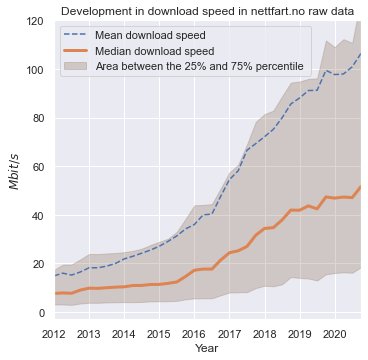

In [49]:
sns.set_theme(style='dark')
fig, ax1 = plt.subplots(figsize = (11/2, 11/2), sharex=False)
df_quart.mean_down.plot(ax=ax1, label='Mean download speed', style='--')
df_quart.median_down.plot(ax=ax1, label='Median download speed', style='-' , linewidth=3)

ax1.fill_between(df_quart.index.values,df_quart["quant_down_0.25"], df_quart["quant_down_0.75"], alpha = 0.3, color='C5', label="Area between the 25% and 75% percentile ")
ax1.set_title("Development in download speed in nettfart.no raw data")
ax1.legend(loc='upper left')

ax1.set_xlabel("Year")

ax1.set_ylabel("$Mbit/s$")
ax1.set_ylim(-3, 120)
ax1.grid(axis='both')
plt.savefig("figs/yearly_dev_web_dat_down")
plt.show()

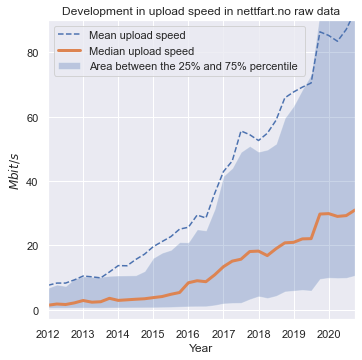

In [50]:
sns.set_theme(style='dark')
fig, ax2 = plt.subplots(figsize = (11/2, 11/2), sharex=False)

df_quart.mean_up.plot(ax=ax2 , label='Mean upload speed', style='--')
df_quart.median_up.plot(ax=ax2 , label='Median upload speed' ,linewidth=3)
ax2.fill_between(df_quart.index.values,df_quart["quant_up_0.25"], df_quart["quant_up_0.75"], alpha = 0.3, label="Area between the 25% and 75% percentile ")

ax2.set_title("Development in upload speed in nettfart.no raw data")
ax2.set_xlabel("Year")
ax2.set_ylabel("$Mbit/s$")
ax2.legend(loc='upper left')
ax2.grid(axis='both')
ax2.set_ylim(-3, 90)
#plt.savefig("figs/yearly_dev_web_dat_up")
plt.show()

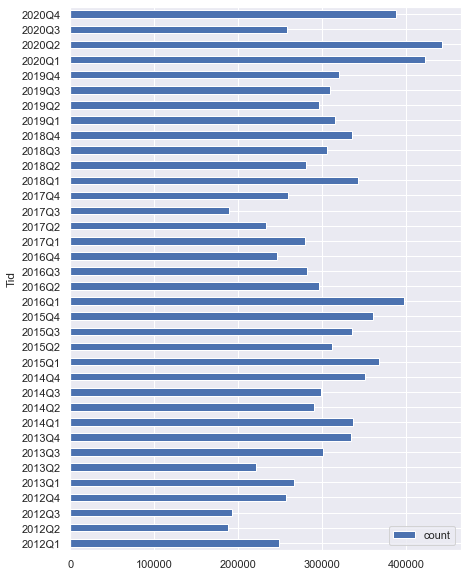

Yearly measurments
 10870580


In [51]:
# number of tests plot
df_quart['Tid'] =pd.PeriodIndex(df_quart.index, freq='Q')
fig, ax = plt.subplots(figsize=(7, 10))
df_quart.plot( kind= 'barh', x='Tid', y='count', ax=ax)
plt.grid()

#ax.set_xticks(["hei", "hei"])
plt.show()
print('Yearly measurments\n', df_quart['count'].sum() )

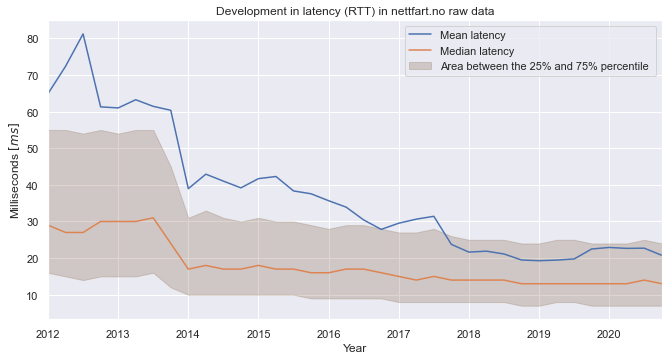

In [52]:
fig, ax1 = plt.subplots(nrows=1, ncols= 1, figsize = (11, 11/2), sharex=False)
df_quart.mean_delay.plot(ax=ax1, label='Mean latency', style='-')
df_quart.median_delay.plot(ax=ax1, label='Median latency', style='-')

ax1.fill_between(df_quart.Tid.values,df_quart["quant_delay_0.25"], df_quart["quant_delay_0.75"], alpha = 0.3, color='C5', label="Area between the 25% and 75% percentile ")
ax1.set_title("Development in latency (RTT) in nettfart.no raw data")
ax1.legend(loc='upper right')

ax1.set_xlabel("Year")

ax1.set_ylabel("Milliseconds $[ms]$")

ax1.grid(axis='both')
#plt.savefig("figs/yearly_dev_latency")
plt.show()

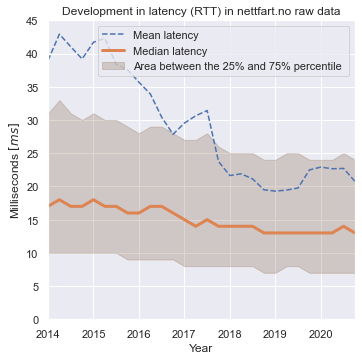

In [53]:
df_quart_lat = df_quart.loc['2014': '2020']
fig, ax1 = plt.subplots(nrows=1, ncols= 1, figsize = (11/2, 11/2), sharex=False)
df_quart_lat.mean_delay.plot(ax=ax1, label='Mean latency', style='--')
df_quart_lat.median_delay.plot(ax=ax1, label='Median latency', style='-' ,linewidth=3)

ax1.fill_between(df_quart_lat.Tid.values,df_quart_lat["quant_delay_0.25"], df_quart_lat["quant_delay_0.75"], alpha = 0.3, color='C5', label="Area between the 25% and 75% percentile ")
ax1.set_title("Development in latency (RTT) in nettfart.no raw data")
ax1.legend(loc='upper right')

ax1.set_xlabel("Year")

ax1.set_ylabel("Milliseconds $[ms]$")
ax1.set_ylim(0, 45)
ax1.grid(axis='both')
#plt.savefig("figs/yearly_dev_latency")
plt.show()

<AxesSubplot:xlabel='Tid'>

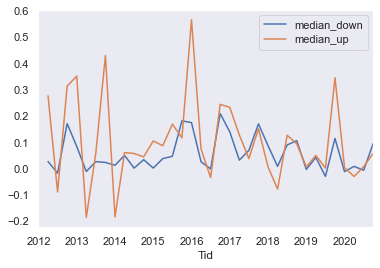

In [54]:
df_quart[['median_down','median_up']].pct_change().plot(kind='line')

In [55]:
df_quart[['median_down','median_up', 'mean_up', 'mean_down']].pct_change()

,median_down,median_up,mean_up,mean_down
Tid,,,,
2012-03-31,NaN,NaN,NaN,NaN
2012-06-30,0.028058,0.278020,0.089684,0.073703
2012-09-30,-0.016452,-0.087984,0.000218,-0.049234
2012-12-31,0.172199,0.315017,0.120769,0.083941
2013-03-31,0.085619,0.352802,0.129138,0.106090
2013-06-30,-0.009884,-0.184626,-0.024091,-0.000878
2013-09-30,0.027478,0.060697,-0.032014,0.036647
2013-12-31,0.024539,0.431412,0.186339,0.058441
2014-03-31,0.013491,-0.182875,0.168266,0.093445


## IQR calculation

In [78]:
df_quart['iqr_down'] = df_quart['quant_down_0.75']-df_quart['quant_down_0.25']
df_quart['iqr_up'] = df_quart['quant_up_0.75']-df_quart['quant_up_0.25']
df_quart['iqr_latency'] = df_quart['quant_delay_0.75']-df_quart['quant_delay_0.25']

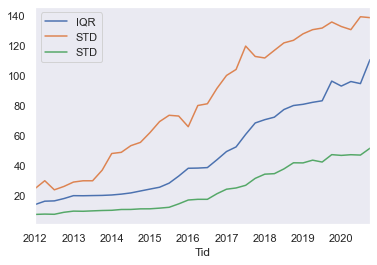

In [87]:
fig, ax = plt.subplots()
df_quart['iqr_down'].plot(ax=ax, label = 'IQR')
df_quart['std_down'].plot(ax=ax, label = 'STD')
df_quart['median_down'].plot(ax=ax, label = 'median')

plt.legend()

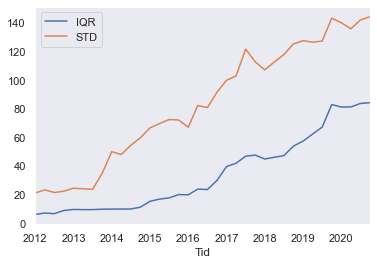

In [80]:
fig, ax = plt.subplots()
df_quart['iqr_up'].plot(ax=ax, label = 'IQR')
df_quart['std_up'].plot(ax=ax, label = 'STD')
plt.legend()

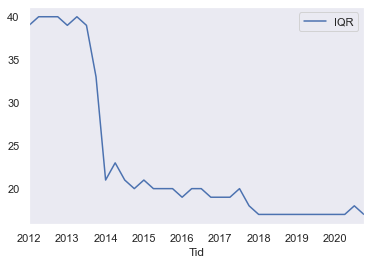

In [81]:
fig, ax = plt.subplots()
df_quart['iqr_latency'].plot(ax=ax, label = 'IQR')
#df_quart['std_delay'].plot(ax=ax, label = 'STD')
plt.legend()

## Pcnt change

In [82]:
last_q_yr = df_quart.groupby(df_quart.index.year).last()

In [83]:
last_q_yr['median_up'].pct_change()

Tid
2012         NaN
2013    0.674739
2014   -0.039410
2015    0.574970
2016    1.029610
2017    0.669437
2018    0.149585
2019    0.430874
2020    0.042334
Name: median_up, dtype: float64

In [58]:
median_dl_yr = last_q_yr[['median_down']]

In [59]:
median_dl_yr['pct_increase'] = np.round(last_q_yr['median_down'].pct_change()*100)


/Users/jesper/master/master_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Tid'>

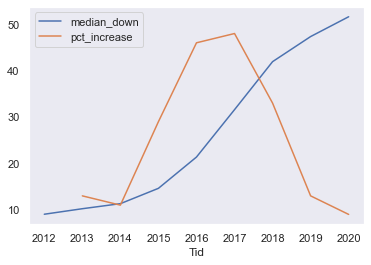

In [60]:
median_dl_yr.plot()

In [61]:
median_dl_yr.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  median\\_down &  pct\\_increase \\\\\nTid  &              &               \\\\\n\\midrule\n2012 &        9.040 &           NaN \\\\\n2013 &       10.229 &          13.0 \\\\\n2014 &       11.318 &          11.0 \\\\\n2015 &       14.625 &          29.0 \\\\\n2016 &       21.369 &          46.0 \\\\\n2017 &       31.584 &          48.0 \\\\\n2018 &       41.932 &          33.0 \\\\\n2019 &       47.344 &          13.0 \\\\\n2020 &       51.617 &           9.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [62]:
median_ul_yr = np.round(last_q_yr[['median_up']],decimals=1)

In [63]:
median_ul_yr['pct_increase'] = np.round(last_q_yr['median_up'].pct_change()*100, decimals=0)

<AxesSubplot:xlabel='Tid'>

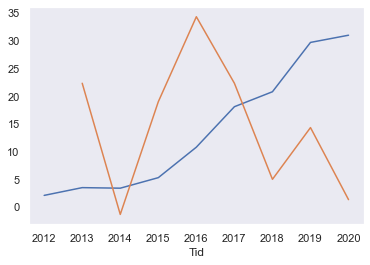

In [64]:
fig, ax = plt.subplots()
median_ul_yr['median_up'].plot(ax=ax)
(median_ul_yr['pct_increase']/3).plot(ax=ax)

In [65]:
median_ul_yr.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  median\\_up &  pct\\_increase \\\\\nTid  &            &               \\\\\n\\midrule\n2012 &        2.1 &           NaN \\\\\n2013 &        3.5 &          67.0 \\\\\n2014 &        3.4 &          -4.0 \\\\\n2015 &        5.3 &          57.0 \\\\\n2016 &       10.8 &         103.0 \\\\\n2017 &       18.1 &          67.0 \\\\\n2018 &       20.8 &          15.0 \\\\\n2019 &       29.7 &          43.0 \\\\\n2020 &       31.0 &           4.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [66]:
median_lat_yr = last_q_yr[['median_delay']]
median_lat_yr['pct_increase'] = np.round(last_q_yr['median_delay'].pct_change()*100)

/Users/jesper/master/master_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Tid'>

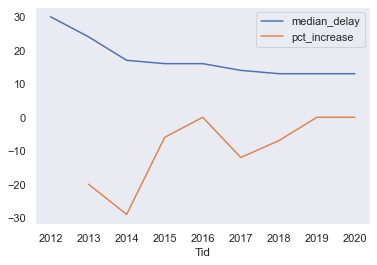

In [67]:
median_lat_yr.plot()

In [68]:
median_lat_yr.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  median\\_delay &  pct\\_increase \\\\\nTid  &               &               \\\\\n\\midrule\n2012 &          30.0 &           NaN \\\\\n2013 &          24.0 &         -20.0 \\\\\n2014 &          17.0 &         -29.0 \\\\\n2015 &          16.0 &          -6.0 \\\\\n2016 &          16.0 &           0.0 \\\\\n2017 &          14.0 &         -12.0 \\\\\n2018 &          13.0 &          -7.0 \\\\\n2019 &          13.0 &           0.0 \\\\\n2020 &          13.0 &           0.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [69]:
median_lat_yr

,median_delay,pct_increase
Tid,,
2012,30.0,NaN
2013,24.0,-20.0
2014,17.0,-29.0
2015,16.0,-6.0
2016,16.0,0.0
2017,14.0,-12.0
2018,13.0,-7.0
2019,13.0,0.0
2020,13.0,0.0


Finding the distance of the interquartile range over time.

In [70]:
last_q_yr['diff_quart'] = last_q_yr['quant_delay_0.75']-last_q_yr['quant_delay_0.25']

<AxesSubplot:xlabel='Tid'>

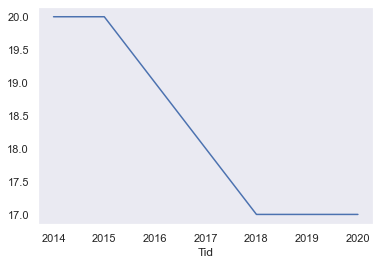

In [71]:
last_q_yr['diff_quart'].loc['2014':'2020'].plot()

In [84]:
last_q_yr['iqr_down']

Tid
2012     18.16350
2013     20.25650
2014     23.19550
2015     33.08600
2016     43.94600
2017     68.39925
2018     79.99375
2019     96.21350
2020    110.47675
Name: iqr_down, dtype: float64

In [85]:
last_q_yr['iqr_up']

Tid
2012     8.98100
2013     9.86600
2014    11.29650
2015    20.08100
2016    29.95000
2017    47.68100
2018    53.97550
2019    83.00375
2020    84.32700
Name: iqr_up, dtype: float64

In [86]:
last_q_yr['iqr_latency']

Tid
2012    40.0
2013    33.0
2014    20.0
2015    20.0
2016    19.0
2017    18.0
2018    17.0
2019    17.0
2020    17.0
Name: iqr_latency, dtype: float64